In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import os # os é bom pra trabalhar com diretorios
import cv2
# import imghdr # pre processamento

In [4]:
import numpy as np

In [5]:
data_dir = r'C:\Users\Enenon\Documents\Projetos Programacao\IC\data\dataset padrao'

In [6]:
from sklearn.model_selection import train_test_split

In [41]:
'''for classificacao in os.listdir(data_dir):
    for dado in os.listdir(os.path.join(data_dir,classificacao)):
        img = cv2.imread(dado)''' #isso aqui não serve mais, não estamos trabalhando com imagens

'for classificacao in os.listdir(data_dir):\n    for dado in os.listdir(os.path.join(data_dir,classificacao)):\n        img = cv2.imread(dado)'

In [42]:
'''for image_class in os.listdir(data_dir): # está escolhendo cada pasta dentro da pasta 'data'
  for image in os.listdir(os.path.join(data_dir, image_class)): # está escolhendo cada imagem dentro da pasta image_class
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = np.loadtxt(image_path, dtype='i', delimiter='	') # le as imagens
      
    except:
      print('Erro em:',image_path) # já q todos os dados estão padronizados, essa parte é inutil'''

"for image_class in os.listdir(data_dir): # está escolhendo cada pasta dentro da pasta 'data'\n  for image in os.listdir(os.path.join(data_dir, image_class)): # está escolhendo cada imagem dentro da pasta image_class\n    image_path = os.path.join(data_dir, image_class, image)\n    try:\n      img = np.loadtxt(image_path, dtype='i', delimiter='\t') # le as imagens\n      \n    except:\n      print('Erro em:',image_path) # já q todos os dados estão padronizados, essa parte é inutil"

# Carregar dados

In [7]:
def ler_matriz(diretorio):
    matriz = np.loadtxt(diretorio)
    return matriz

In [8]:
def ler_matriz_reaHUB(diretorio):
    matriz = ler_matriz(diretorio)
    soma = 0
    for i in range(len(matriz)):
        for j in range(len(matriz[i])):
            soma += matriz[i][j]
    media = soma/(len(matriz)*len(matriz[1]))
    desvio = np.std(matriz)
    minimo = media + 1*desvio
    matriz2 = np.zeros((len(matriz),len(matriz[0])))
    for i in range(len(matriz)):
        for j in range(len(matriz[i])):
            if matriz[i][j] >= minimo:
                matriz2[i][j] = matriz[i][j] # não preciso de um else por causa do np.zeros()
                # após testar descobri q assim é muito mais leve que list comprehension  
    return matriz2

import networkx as nx
def ler_matriz_vizinhanca(diretorio):
    matriz = ler_matriz(diretorio)
    G = nx.from_numpy_array(matriz)
    distance_matrix = np.zeros((64,64))
    for i, node1 in enumerate(G.nodes()):
        for j, node2 in enumerate(G.nodes()):
            if i == j:
                distance_matrix[i][j] = 0
            else:
                try:
                    distance_matrix[i][j] = nx.shortest_path_length(G, source=node1, target=node2, weight='weight')
                except nx.NetworkXNoPath:
                    # If no path exists, set distance to infinity
                    distance_matrix[i][j] = float('inf')

    return distance_matrix

import metricas

In [9]:
try: # esse np.load() é muito útil para acelerar o processo de importação, mas em caso de alteração dos dados ou coisa parecida é melhor excluir os .npz para rodar o except
    with np.load(data_dir+'\\x.npz') as eletr_score:
        for item in eletr_score.files:
            x = eletr_score[item]
    with np.load(data_dir+'\\y.npz') as data_xS:
        for item in data_xS.files:
            y = data_xS[item]
    print('Dataset .npz encontrado!')
except:
    print('Dataset .npz não encontrado :(, carregando os arquivos diretamente...')
    diretorios = [os.path.join(data_dir, diretorio) for diretorio in os.listdir(data_dir)]
    print('Diretórios:',*diretorios)
    #print(os.path.join(data_dir,diretorios[0],os.listdir(diretorios[0])[0]))
    #print([ler_matriz(os.path.join(data_dir,diretorios[0],dado)) for dado in os.listdir(r'C:\Users\Enenon\Documents\Projetos Programacao\IC\data\T0e')])
    x = []
    y = []
    for i in range(len(diretorios)):
        #x = x + np.asarray([ler_matriz(os.path.join(data_dir,diretorios[i],dado)) for dado in os.listdir(os.path.join(data_dir,diretorios[i]))])
        # isso aqui é lindo
        # se eu quiser tirar o t0 é só botar if i != 0
        if i!= 4:
            for dado in os.listdir(os.path.join(data_dir,diretorios[i])):
                if dado[:3] in ['R04','R08','R12']: # isso aqui pega só as imagéticas
                    x = x + [ler_matriz(os.path.join(data_dir,diretorios[i],dado))]
                    y = y + [i]
        #y = y + [np.int32(i) for j in range(len(os.listdir(os.path.join(data_dir,diretorios[i]))))]
    np.savez(data_dir+'\\x.npz',x)
    np.savez(data_dir+'\\y.npz',y)
'''data = tf.keras.utils.text_dataset_from_directory(data_dir) # era image_dataset_from_directory
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next() # aqui ele pegou um lote
# batch[0] são as matrizes e batch[1] são as classificações das matrizes'''

Dataset .npz encontrado!


'data = tf.keras.utils.text_dataset_from_directory(data_dir) # era image_dataset_from_directory\ndata_iterator = data.as_numpy_iterator()\nbatch = data_iterator.next() # aqui ele pegou um lote\n# batch[0] são as matrizes e batch[1] são as classificações das matrizes'

In [ ]:
try: # esse np.load() é muito útil para acelerar o processo de importação, mas em caso de alteração dos dados ou coisa parecida é melhor excluir os .npz para rodar o except
    with np.load(data_dir+'\\x.npz') as eletr_score:
        for item in eletr_score.files:
            x = eletr_score[item]
    with np.load(data_dir+'\\y.npz') as data_xS:
        for item in data_xS.files:
            y = data_xS[item]
    print('Dataset .npz encontrado!')
except:
    print('Dataset .npz não encontrado :(, carregando os arquivos diretamente...')
    diretorios = [os.path.join(data_dir, diretorio) for diretorio in os.listdir(data_dir)]
    print('Diretórios:',*diretorios)
    x = []
    y = []
    for i in range(len(diretorios)):
        # isso aqui é lindo
        if i!= 4: # se eu quiser tirar o t0 é só colocar if i != 0
            for dado in os.listdir(os.path.join(data_dir,diretorios[i])):
                if dado[:3] in ['R04','R08','R12']: # isso aqui pega só as imagéticas
                    x = x + [ler_matriz(os.path.join(data_dir,diretorios[i],dado))]
                    y = y + [i]
    np.savez(data_dir+'\\x.npz',x)
    np.savez(data_dir+'\\y.npz',y)

Dataset .npz não encontrado :(, carregando os arquivos diretamente...
Diretórios: C:\Users\Enenon\Documents\Projetos Programacao\IC\data\dataset padrao\T0e C:\Users\Enenon\Documents\Projetos Programacao\IC\data\dataset padrao\T1e C:\Users\Enenon\Documents\Projetos Programacao\IC\data\dataset padrao\T2e


'data = tf.keras.utils.text_dataset_from_directory(data_dir) # era image_dataset_from_directory\ndata_iterator = data.as_numpy_iterator()\nbatch = data_iterator.next() # aqui ele pegou um lote\n# batch[0] são as matrizes e batch[1] são as classificações das matrizes'

In [60]:
x = np.asarray(x)
y = np.asarray(y)
from numpy import nan_to_num
y = nan_to_num(y)

# Ler os dados direto do PC

In [10]:
xS = []
xC = []
dir_metricas = 'C:\\Users\\Enenon\\Documents\\Projetos Programacao\\IC\\data\\'
try:
    with np.load(dir_metricas+'xC.npz') as eletr_score:
        for item in eletr_score.files:
            xC = eletr_score[item]
    with np.load(dir_metricas+'xS.npz') as data_xS:
        for item in data_xS.files:
            xS = data_xS[item]

except:
    print('Não foi encontrado os arquivos de xC e xS')
    print('Fazendo conversão do tensor...')
    for matriz in x:
        xS.append(metricas.S(matriz))
        xC.append(metricas.C(matriz))
    np.savez(dir_metricas+'xC.npz', xC) # isso salva a matriz de xC pra não precisar ter q importar sempre
    np.savez(dir_metricas+'xS.npz', xS)

Essa parte seguinte normaliza um tensor. Por ser um processo lento, irei deixar como comentário.

Tirando de comentário, passe a usar *xnorm* ao invés de *x* (confira o *model.fit()*)

In [24]:
def max(tensor,isTensor=True):
    maior = 0
    def acham(matriz,maior):
        for i in matriz:
                    for j in i:
                        if j > maior:
                            maior = j
        return maior
    if isTensor == True:
        try:
            
                if len(tensor.shape) > 3:
                    for matriz in tensor:
                        maior = acham(matriz,maior)
                else:
                    for matriz in tensor:
                        maior = acham(matriz,maior)
        except:
            matriz = tensor
            maior = acham(matriz,maior)
    else:
        matriz = tensor
        maior = acham(matriz,maior)
    return maior

#xnorm = x
#xnorm = xnorm/max(xnorm)
#plt.imshow(xnorm[0])

In [25]:
#plt.imshow(x[0]-xnorm[0]*255,cmap=plt.cm.binary)

Não concatenamos mais o data dessa forma por causa de um erro na fitagem do modelo

In [26]:
x.shape

(17073, 64, 64)

Apenas para printar um lote

In [27]:
'''cont = 0
for batch in data:
    print(batch)
    cont += 1
    if cont > 10:
        break
print(cont)'''

'cont = 0\nfor batch in data:\n    print(batch)\n    cont += 1\n    if cont > 10:\n        break\nprint(cont)'

# Escalonar dados

In [28]:
#data = data.map(lambda x,y: (x/255, y)) #isso aqui normaliza as matrizes, passando a ser de 0 a 255 para de 0 a 1

# Separar dados

In [29]:
'''treino_size = int(len(data)*0.7)
valor_size = int(len(data)*0.2)
teste_size = int(len(data)*0.1)'''

'treino_size = int(len(data)*0.7)\nvalor_size = int(len(data)*0.2)\nteste_size = int(len(data)*0.1)'

In [30]:
'''train = data.take(treino_size)
val = data.skip(treino_size).take(valor_size)
test = data.skip(treino_size+valor_size).take(teste_size)'''

'train = data.take(treino_size)\nval = data.skip(treino_size).take(valor_size)\ntest = data.skip(treino_size+valor_size).take(teste_size)'

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import scipy.sparse.linalg

In [ ]:
# esse aqui foi o teste com apenas o primeiro eletrodo antes de passar para um loop
'''
#xn = x[:,0,:]
xSn = (xS[:,0]/xS[:,0].max()).reshape(-1, 1)
xCn = (xC[:,0]/xC[:,0].max()).reshape(-1, 1)

count = 0

x_train, x_test, y_train, y_test = train_test_split(xSn, y, test_size=0.10)
print('separado!')
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train, y_train)
print('modelo fitado!')
# fazer previsões no conjunto de teste
y_pred = svm_model.predict(x_test)
print('tomou predict!')
# avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

'''

In [33]:
xC = nan_to_num(xC)
xS = nan_to_num(xS)

In [22]:
xCn = xC/xC.max()
xSn = xS/xS.max()

In [11]:
def scoresvm(x,y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

    svm_model = SVC(kernel='linear', C=1.0)
    svm_model.fit(x_train, y_train)

    # fazer previsões no conjunto de teste
    y_pred = svm_model.predict(x_test)

    # avaliar a precisão do modelo
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

eletr_score = []

for i in range(len(x[0])):
    print(f'eletrodo nº{i}', end='')
    #xn = x[:,i,:]
    xSn = (xS[:,i]/xS[:,i].max()).reshape(-1, 1)
    xCn = (xC[:,i]/xC[:,i].max()).reshape(-1, 1)
    print(', eixos separados!', end='')
    score = []
    count = 0
    for xi in(xSn,xCn):
        score.append(scoresvm(xi,y))
        print('.', end='')
        count += 1
    print()
    eletr_score.append(score)

print(eletr_score) # aqui é o score do treino usando as características S e C de cada eletrodo

eletrodo nº0, eixos separados!

ValueError: Found input variables with inconsistent numbers of samples: [17073, 8527]

In [28]:
np.savez(dir_metricas+'score eletrodos.npz', eletr_score)

In [29]:
try:
    eletr_score
    print('...')
except:
    with np.load(dir_metricas+'score eletrodos.npz') as eletr_scorez:
            for item in eletr_scorez.files:
                eletr_score = eletr_scorez[item]
                print(eletr_scorez[item])

...


In [14]:
#del eletr_score

In [39]:
eletr_score = np.array(eletr_score)

In [40]:
ord_xS = np.array(range(64))[np.argsort(-eletr_score[:,0])]
ord_xC = np.array(range(64))[np.argsort(-eletr_score[:,1])]
print('Esses são os melhores eletrodos para a métrica S:',*ord_xS)
print('Esses são os melhores eletrodos para a métrica C:',*ord_xC)
print('(Do melhor desempenho para o pior desempenho)')

Esses são os melhores eletrodos para a métrica S: 16 4 0 14 40 29 44 61 45 19 42 25 62 27 47 28 43 3 57 13 49 15 10 50 6 56 46 22 31 24 60 8 11 21 2 39 7 26 18 54 52 30 41 51 33 34 63 48 37 35 23 32 17 36 59 1 12 58 5 20 53 38 55 9
Esses são os melhores eletrodos para a métrica C: 53 14 10 29 56 41 19 36 61 1 5 34 46 16 62 45 38 15 58 52 49 57 43 8 63 37 55 47 9 28 39 26 12 24 13 27 6 7 23 33 25 0 32 21 54 11 60 3 40 20 31 51 22 44 17 48 4 2 50 30 18 42 35 59
(Do melhor desempenho para o pior desempenho)


In [45]:
print(np.concatenate((xS[0],xC[0])).shape)

(128,)


In [47]:
threshold_melhores = 0.8
nxS = [[elemento for i, elemento in enumerate(j) if i in ord_xS[0:int(64*threshold_melhores)]] for j in xS]
nxC = [[elemento for i, elemento in enumerate(j) if i in ord_xC[0:int(64*threshold_melhores)]] for j in xC]

In [51]:
tensor_melhores = np.concatenate((nxS,nxC),axis=1)
print(tensor_melhores.shape)

(17073, 102)


In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import scipy.sparse.linalg
def fit_svm(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)
    svm_model = SVC(kernel='linear', C=1.0)
    svm_model.fit(x_train, y_train) 

    y_pred = svm_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Modelo fitado! Acurácia:', accuracy)
    return svm_model

In [52]:
tensor_melhores = (tensor_melhores[:,0]/tensor_melhores[:,0].max()).reshape(-1, 1)
model_melhores = fit_svm(tensor_melhores,y)


Modelo fitado! Acurácia: 0.4882903981264637


In [90]:
ummm = [True if i%2 == 0 else False for i in range(len(melhoresXS))]
melhoresXS[np.array(melhoresXS) != np.array(None)]

TypeError: only integer scalar arrays can be converted to a scalar index

In [91]:
# std é o desvio padrão
minimoXS = np.std(eletr_score[:,0]) + sum(eletr_score[:,0])/len(ord_xS)
melhoresXS = [i for i in eletr_score[:,0] if i > minimoXS]
minimoXC = np.std(eletr_score[:,1]) + sum(eletr_score[:,1])/len(ord_xS)
melhoresXC = [i for i in eletr_score[:,1] if i > minimoXS]

melhoresXS

[0.5216627634660421,
 0.5257611241217799,
 0.5187353629976581,
 0.531615925058548,
 0.5122950819672131,
 0.5152224824355972,
 0.5181498829039812,
 0.5152224824355972,
 0.5134660421545667,
 0.5140515222482436]

In [45]:
xS[0:24]

array([[16232., 20067., 21029., ..., 14919., 15765., 13536.],
       [17665., 20114., 20029., ..., 15648., 12671.,  9201.],
       [12777., 15028., 17337., ..., 16460., 14771., 14102.],
       ...,
       [17387., 19777., 20376., ..., 17727., 17464., 14572.],
       [14349., 18039., 18874., ..., 18821., 15787., 15793.],
       [13938., 15882., 17424., ..., 16970., 17058., 17053.]])

In [ ]:
#for batch in train:
    #print(batch)

# Construir modelo Deep Learning

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras

In [63]:
model = Sequential() # agrupa uma pilha linear de camadas
#model.add(Conv2D(16, (3,3), 4, activation='relu', input_shape=(256,256,3)))
#model.add(MaxPooling2D()) # esses primeiros tavam dando erro e ai tirei enquanto nao resolvo

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1))) #mudei o numero de 1 pra 4, veremos no q vai dar
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 'adam' é o otimizador, que configura como o modelo vai reajustar os pesos / antigamente o loss era o BinaryCrossEntropy mas ele era apenas pra casos de true e false, depois mudei pra tf.losses.CategoricalCrossentropy() só q tava dando problema

Modelo que funciona (mas estou tendo problemas com Conv2D e MaxPooling2D)

In [64]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train,y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
240/240 [==============================] - 18s 71ms/step - loss: 8.3865 - accuracy: 0.3984 - val_loss: 2.2436 - val_accuracy: 0.3294
Epoch 2/10
240/240 [==============================] - 17s 69ms/step - loss: 1.4682 - accuracy: 0.4709 - val_loss: 1.4057 - val_accuracy: 0.4080
Epoch 3/10
240/240 [==============================] - 16s 66ms/step - loss: 1.1407 - accuracy: 0.5087 - val_loss: 1.2959 - val_accuracy: 0.4549
Epoch 4/10
240/240 [==============================] - 15s 62ms/step - loss: 1.0164 - accuracy: 0.5508 - val_loss: 1.1922 - val_accuracy: 0.4513
Epoch 5/10
240/240 [==============================] - 16s 66ms/step - loss: 0.9244 - accuracy: 0.5908 - val_loss: 1.3428 - val_accuracy: 0.3834
Epoch 6/10
240/240 [==============================] - 16s 66ms/step - loss: 0.9120 - accuracy: 0.6015 - val_loss: 1.2909 - val_accuracy: 0.4467
Epoch 7/10
240/240 [==============================] - 17s 71ms/step - loss: 0.8350 - accuracy: 0.6383 - val_loss: 1.2926 - val_accuracy:

Modelo mais robusto

In [69]:
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(64,64,1)))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(Conv2D(64, (3,3), 1, activation='relu')) 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train,y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
240/240 [==============================] - 69s 281ms/step - loss: 1.7759 - accuracy: 0.4919 - val_loss: 1.0482 - val_accuracy: 0.4889
Epoch 2/10
240/240 [==============================] - 64s 268ms/step - loss: 1.0331 - accuracy: 0.5004 - val_loss: 1.0432 - val_accuracy: 0.4877
Epoch 3/10
240/240 [==============================] - 64s 266ms/step - loss: 1.0249 - accuracy: 0.5027 - val_loss: 1.0577 - val_accuracy: 0.4889
Epoch 4/10
240/240 [==============================] - 69s 287ms/step - loss: 1.0210 - accuracy: 0.5021 - val_loss: 1.0411 - val_accuracy: 0.4877
Epoch 5/10
240/240 [==============================] - 62s 257ms/step - loss: 1.0160 - accuracy: 0.5021 - val_loss: 1.0381 - val_accuracy: 0.4889
Epoch 6/10
240/240 [==============================] - 60s 250ms/step - loss: 1.0084 - accuracy: 0.5042 - val_loss: 1.0408 - val_accuracy: 0.4971
Epoch 7/10
240/240 [==============================] - 59s 247ms/step - loss: 1.0058 - accuracy: 0.5042 - val_loss: 1.0419 - val_ac

Criando um modelo em SVM

In [17]:
len(x_train),len(y_train)

(15365, 15365)

In [60]:
x_train.shape

(14085, 64, 64)

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import scipy.sparse.linalg

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train.reshape(x_train.shape[0],-1), y_train)

Testar o SVM

In [25]:
# fazer previsões no conjunto de teste
y_pred = svm_model.predict(x_test)

# avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)

In [26]:
accuracy

0.5052693208430913

# Treinar

In [ ]:
#logdir='logs'

In [ ]:
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Note que este de baixo tá dando erro. Substituindo *train* por *x,y* e tirando o *validation_data*, ele funfa normalmente. O problema agora é conseguir mais precisão.

In [ ]:
#hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback]) #mudei epocas pra 3, antes era 20

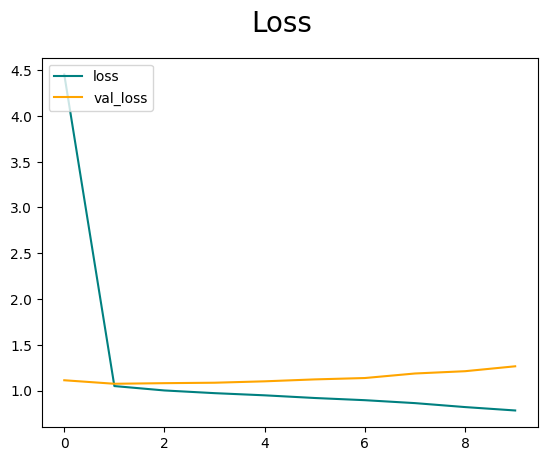

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

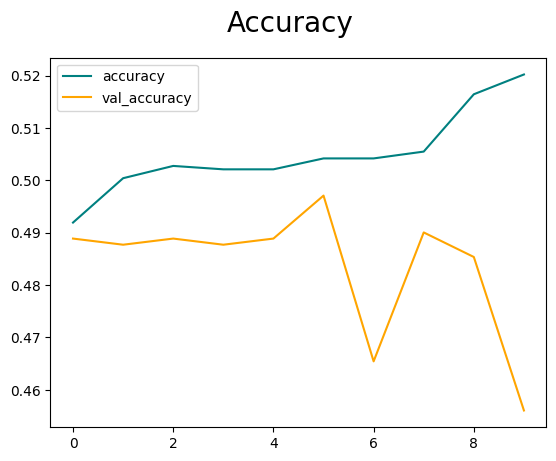

In [70]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

27/27 [==============================] - 2s 67ms/step


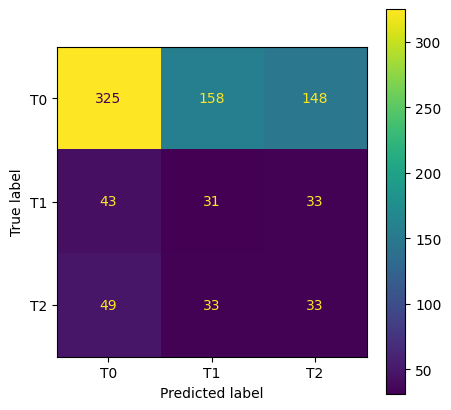

: 

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#Make predictions
y_probs = model.predict(x_test)
#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
#Confusion matrix
cm=confusion_matrix(y_preds,y_test)
#
label_names = ["T0","T1","T2"]
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax)

# Avaliar

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
'''for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat) # antes n tava dando erro mas agora q eu ajeitei lá em cima, tá dando erro, vai entender
    re.update_state(y, yhat)
    acc.update_state(y, yhat)'''

'for batch in test.as_numpy_iterator():\n    X, y = batch\n    yhat = model.predict(X)\n    pre.update_state(y, yhat) # antes n tava dando erro mas agora q eu ajeitei lá em cima, tá dando erro, vai entender\n    re.update_state(y, yhat)\n    acc.update_state(y, yhat)'

In [ ]:
'''for batch in test.as_numpy_iterator():
  x, y = batch
  print(y,yhat)
  print('----------')'''

"for batch in test.as_numpy_iterator():\n  x, y = batch\n  print(y,yhat)\n  print('----------')"

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# Testar

In [ ]:
import cv2
from skimage import io

ModuleNotFoundError: No module named 'skimage'

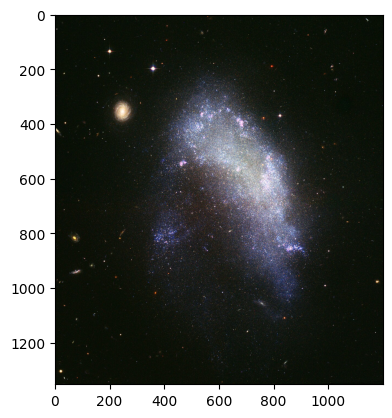

In [ ]:
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Irregular_galaxy_NGC_1427A_%28captured_by_the_Hubble_Space_Telescope%29.jpg/1200px-Irregular_galaxy_NGC_1427A_%28captured_by_the_Hubble_Space_Telescope%29.jpg')
''' arr = np.asarray(bytearray(req.read()),dtype=np.uint8)
img = cv2.imdecode(arr, -1) '''

plt.imshow(img)
plt.show()

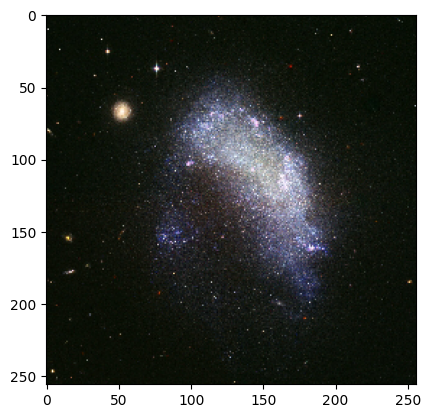

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0)) # divide por 255 como fez antes

1/1 [==============================] - 0s 83ms/step


In [ ]:
print(yhat)
np.argmax(yhat)

[[0.01211213 0.7851297  0.6447444  0.72309196]]


1

# Salvar modelo (não testei)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))